In [ ]:
# Importing the module to interact with Google Drive in Google Colab
from google.colab import drive

# Mounting Google Drive to the '/content/drive' directory to access files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mount Google Drive to access files stored in your Drive
from google.colab import drive
drive.mount('/content/drive')

# Import the pandas library to work with tabular data
import pandas as pd

# Define the path to the CSV file located in the 'NBA_Project' folder on Google Drive
file_path = '/content/drive/MyDrive/NBA_Project/nba_stats.csv'

# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame to get an overview of the data
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PLAYER;TEAM;AGE;GP;G;FREQ;FGM;FGA;FG%;EFG%;2FG FREQ;2FGM;2FGA;2FG%;3FG FREQ;3PM;3PA;3P%;NONE
0,Luka Doncic;DAL;24;45;45;100;11.6;23.7;49.1;57...
1,Joel Embiid;PHI;29;34;34;100;11.8;22.2;53.3;56...
2,Donovan Mitchell;CLE;27;42;42;100;9.9;20.9;47....
3,De'Aaron Fox;SAC;26;46;46;100;9.4;20.3;46.5;53...
4,Jalen Brunson;NYK;27;50;50;100;9.7;20.1;48.4;5...


In [ ]:
# Import the pandas library for data manipulation
import pandas as pd

# Read the CSV file using the correct delimiter (semicolon, commonly used in Europe)
df = pd.read_csv('/content/drive/MyDrive/NBA_Project/nba_stats.csv', sep=';')

# Display the first 5 rows of the DataFrame for a quick preview of the data
print(df.head())

# Display the data types of each column (useful for identifying potential issues, such as numbers read as text)
print(df.dtypes)


             PLAYER TEAM  AGE  GP   G  FREQ   FGM   FGA   FG%  EFG%  2FG FREQ  \
0       Luka Doncic  DAL   24  45  45   100  11.6  23.7  49.1  57.5      56.1   
1       Joel Embiid  PHI   29  34  34   100  11.8  22.2  53.3  56.0      85.1   
2  Donovan Mitchell  CLE   27  42  42   100   9.9  20.9  47.5  55.5      56.1   
3      De'Aaron Fox  SAC   26  46  46   100   9.4  20.3  46.5  53.6      62.0   
4     Jalen Brunson  NYK   27  50  50   100   9.7  20.1  48.4  54.9      68.0   

   2FGM  2FGA  2FG%  3FG FREQ  3PM   3PA   3P%  NONE  
0   7.7  13.3  57.8      43.9  4.0  10.4  38.1   NaN  
1  10.6  18.9  56.3      14.9  1.2   3.3  36.8   NaN  
2   6.6  11.7  56.5      43.9  3.3   9.2  36.1   NaN  
3   6.5  12.6  51.9      38.0  2.9   7.7  37.5   NaN  
4   7.1  13.7  52.0      32.0  2.6   6.4  40.7   NaN  
PLAYER       object
TEAM         object
AGE           int64
GP            int64
G             int64
FREQ          int64
FGM         float64
FGA         float64
FG%         float64
EFG

In [ ]:
from sklearn.preprocessing import StandardScaler

# Remove irrelevant columns for the analysis (such as player name, team, or empty columns)
# 'errors="ignore"' prevents an error if one of the columns does not exist
features = df.drop(columns=['PLAYER', 'TEAM', 'NONE'], errors='ignore')

# Standardize the data: transforms the variables to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Remove irrelevant columns (textual or unnecessary for the analysis)
features = df.drop(columns=['PLAYER', 'TEAM', 'NONE'], errors='ignore')

# Handle missing values:
# Replace NaNs (missing values) with the mean of each column
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardize the data so that each variable has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix between all players
# Each row represents a player, and each column represents their similarity to other players
similarity_matrix = cosine_similarity(features_scaled)


In [ ]:
import numpy as np

# Extract the list of player names from the DataFrame
players = df['PLAYER'].tolist()

# Choose a player for whom we want to find similar profiles
player_name = 'Luka Doncic'

# Find the index of the selected player in the list
player_idx = players.index(player_name)

# Extract similarity scores between the selected player and all other players
similarities = similarity_matrix[player_idx]

# Sort indices in descending order of similarity (excluding the player themselves by skipping the first)
most_similar_idx = np.argsort(similarities)[::-1][1:6]

# Display the top 5 most similar players along with their similarity scores
print(f"Players most similar to {player_name}:")
for idx in most_similar_idx:
    print(f"{players[idx]} (score: {similarities[idx]:.4f})")


Joueurs les plus similaires à Luka Doncic :
Donovan Mitchell (score: 0.9946)
Desmond Bane (score: 0.9940)
Jayson Tatum (score: 0.9909)
Tyrese Maxey (score: 0.9860)
De'Aaron Fox (score: 0.9852)


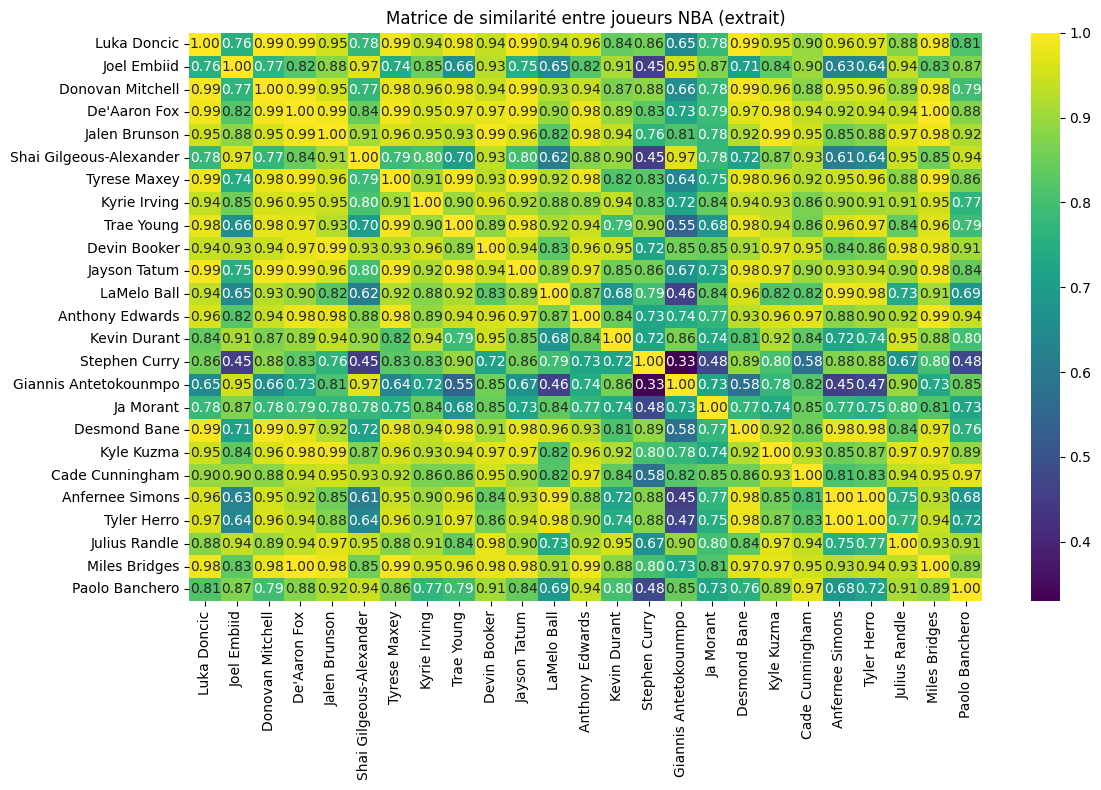

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# 1. Player clustering (KMeans)
# -----------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

df['Cluster'] = clusters  # Add cluster labels to the original DataFrame

# -----------------------------
# 2. Dimensionality reduction to 2D using PCA
# -----------------------------
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

df['PCA1'] = features_pca[:, 0]
df['PCA2'] = features_pca[:, 1]

# -----------------------------
# 3. Interactive visualization with Plotly
# -----------------------------
fig = px.scatter(df, x='PCA1', y='PCA2', color='Cluster', hover_name='PLAYER',
                 title='NBA Player Clustering (PCA + KMeans)',
                 labels={'Cluster': 'Group'})
fig.show()

# -----------------------------
# 4. Similarity heatmap (Seaborn)
# -----------------------------
# Limit to a subset for readability (e.g., first 25 players)
import numpy as np
subset_indices = df.index[:25]
subset_similarity = cosine_similarity(features_scaled[subset_indices])

plt.figure(figsize=(12, 8))
sns.heatmap(subset_similarity, xticklabels=df['PLAYER'].iloc[subset_indices],
            yticklabels=df['PLAYER'].iloc[subset_indices], cmap="viridis", annot=True, fmt=".2f")
plt.title("Similarity Matrix Between NBA Players (Sample)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
